# 1D Magnetotelluric example
```ETHZ, 651-4109-00L Geothermal Energy FS2025```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

## 1D MT function

For further explanations of the forward modelling routine see https://empymod.emsig.xyz/en/stable/gallery/fdomain/magnetotelluric.html.

In [2]:
def mt1d(resistivities, depths, omega):
    """MT data for a layered model using the plane wave assumption.

    Parameters
    ----------
    resistivities : array-like, size n
        Resistivities (Ohm.m) of the layers, usually starting with a high value for the air.
    depths : array-like, size n-1
        Interfaces (m), with postitive z pointing upwards.
    omega : array, size f
        Angular frequencies (rad).

    Returns
    -------
    apres : array, size f
        Apparent resistivities (Ohm.m).
    phase : array, size f
        Phases (°)
    
    """
    mu_0 = 4e-7*np.pi
    
    # Initiate recursive formula with impedance of the deepest layer.
    Z_j = np.sqrt(omega * 1j  * mu_0 * resistivities[-1])
    
    # Move up the stack of layers till the top (without air).
    for j in range(len(depths)-1, 0, -1):

        # Thickness
        t_j = depths[j-1] - depths[j]
    
        # Intrinsic impedance
        z_oj = np.sqrt(1j * omega * mu_0 * resistivities[j])
    
        # Reflection coefficient
        R_j = (z_oj - Z_j) / (z_oj + Z_j)
    
        # Exponential factor
        gamma_j = np.sqrt(1j * omega * mu_0 / resistivities[j])
        exp_j = np.exp(-2 * gamma_j * t_j)
    
        # Impedance at this layer
        Z_j = z_oj * (1 - R_j * exp_j) / (1 + R_j * exp_j)
    
    # Step 3. Compute apparent resistivity last impedance
    return abs(Z_j)**2/(omega * mu_0), np.arctan2(Z_j.imag, Z_j.real)*180/np.pi

In [3]:
# Define periods / angular frequencies
periods = np.logspace(-2, 4, 101)
omega = 2 * np.pi / periods

# Compute the four cases
apres1, phase1 = mt1d(resistivities=[2e14, 10, 100], depths=[0, -2000], omega=omega)
apres2, phase2 = mt1d(resistivities=[2e14, 10, 100], depths=[0, -3000], omega=omega)
apres3, phase3 = mt1d(resistivities=[2e14, 10, 100, 1, 100], depths=[0, -3000, -8000, -8500], omega=omega)
apres4, phase4 = mt1d(resistivities=[2e14, 10, 1], depths=[0, -3000], omega=omega)

# Plot

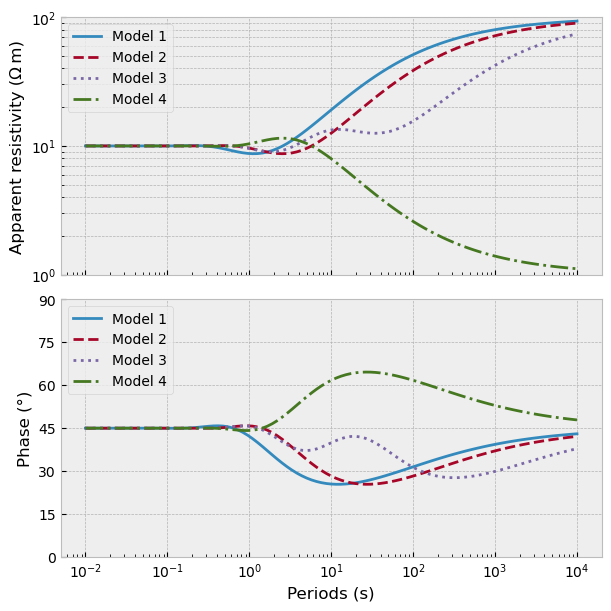

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6), sharex=True, constrained_layout=True)
ls = ['-', '--', ':', '-.']

for i, apres in enumerate([apres1, apres2, apres3, apres4]):
    axs[0].loglog(periods, apres, ls=ls[i], label=f'Model {i+1}')
axs[0].set_xlim([5e-3, 2e4])
axs[0].set_ylim([1e0, 1e2])
axs[0].set_ylabel('Apparent resistivity (Ω m)')

for i, phase in enumerate([phase1, phase2, phase3, phase4]):
    axs[1].semilogx(periods, phase, ls=ls[i], label=f'Model {i+1}')
axs[1].set_ylim([0, 90])
axs[1].set_yticks(np.arange(7)*15)
axs[1].set_xlabel('Periods (s)')
axs[1].set_ylabel('Phase (°)')

for ax in axs:
    ax.grid(visible=True, which='both', axis='y')
    ax.legend(loc=2)

fig.savefig('1Dmodels.png', dpi=300)

In [5]:
import scooby
scooby.Report()

--------------------------------------------------------------------------------
  Date: Sat Apr 26 10:59:05 2025 CEST

                OS : Darwin (macOS 15.3.2)
            CPU(s) : 14
           Machine : arm64
      Architecture : 64bit
               RAM : 48.0 GiB
       Environment : Jupyter
       File system : apfs

  Python 3.12.8 | packaged by conda-forge | (main, Dec  5 2024, 14:19:53)
  [Clang 18.1.8 ]

             numpy : 2.2.5
             scipy : 1.15.2
           IPython : 8.31.0
        matplotlib : 3.10.0
            scooby : 0.10.0
--------------------------------------------------------------------------------